In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute
import tensorflow as tf
import requests
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import codecs
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
#nltk.download('all')

In [2]:
btc = pd.read_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\Machine Learning\btc_updated.csv")
headers = pd.read_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\Machine Learning\headers.csv")
#BTC = df3.to_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\Machine Learning\dv.csv")

In [306]:
import time

# WebDriver'ı ve bekleme süresi
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
wait = WebDriverWait(driver, 10)

# Toplam sayfa sayısı
total_pages = 3116

titles = []
general_xpath = '//*[@id="queryly_advanced_container"]//div//a[2]/h6'
# Tüm sayfaları dön
for i in range(total_pages):
    # Her sayfanın URL'sini oluştur
    url = f'https://www.coindesk.com/search?s=Bitcoin&i={i + 1}'
    
    # URL'yi aç
    driver.get(url)

    # Belirli bir duruma kadar bekle
    wait.until(EC.presence_of_all_elements_located((By.XPATH, general_xpath)))

    # Başlıkları çek
    elements = driver.find_elements(By.XPATH,general_xpath)
    for element in elements:
        titles.append(element.text)

# WebDriver'ı kapat
driver.quit()
df6 = pd.DataFrame(titles, columns=['Haber Başlıkları'])

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
wait = WebDriverWait(driver, 10)

# Toplam sayfa sayısı
total_pages = 3116

dates = []
general_xpath = '//*[@id="queryly_advanced_container"]/div/div/div/div/div/div/div/div/h6'


# Tüm sayfaları dön
for i in range(total_pages):
    # Her sayfanın URL'sini oluştur
    url = f'https://www.coindesk.com/search?s=Bitcoin&i={i + 1}'
    
    # URL'yi aç
    driver.get(url)
    time.sleep(3)
    # Belirli bir duruma kadar bekle
    wait.until(EC.presence_of_all_elements_located((By.XPATH, general_xpath)))

    # Başlıkları çek
    elements = driver.find_elements(By.XPATH,general_xpath)
    for element in elements:
        dates.append(element.text)

# WebDriver'ı kapat
driver.quit()
df3 = pd.DataFrame(dates, columns=['Dates'])

In [3]:
final=headers.merge(btc,how='left',left_on='Dates',right_on='Dates')
final

,Haber_Basliklari,Dates,Price
0,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...,30.05.23,27735.0
1,Bitcoin Mining Difficulty’s Record Setting Str...,30.05.23,27735.0
2,La dificultad para minar bitcoin alcanzó un ré...,30.05.23,27735.0
3,BRC-721E Token Standard Converts Ethereum NFTs...,30.05.23,27735.0
4,Bitcoin Headed for First Monthly Loss in 6 Months,30.05.23,27735.0
...,...,...,...
31061,Ripple plan to make its software open source o...,26.08.13,112.0
31062,UNOCS altcoin partnership dismantled following...,30.07.13,96.0
31063,CoinTerra and HashFast flesh out ASIC miner pr...,18.07.13,85.0
31064,KnCMiner takes delivery of ASIC boards,05.07.13,66.0


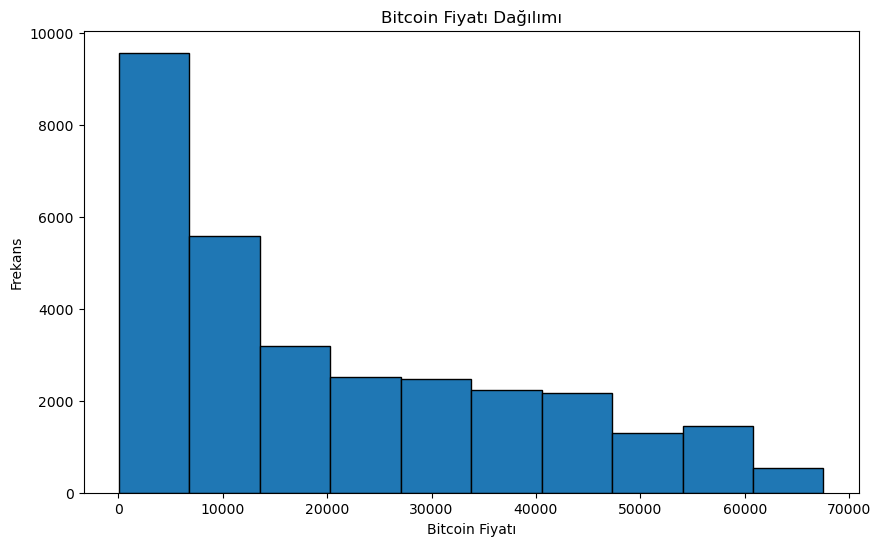

In [4]:
plt.figure(figsize=(10,6))
plt.hist(final['Price'], bins=10, edgecolor='black')
plt.title('Bitcoin Fiyatı Dağılımı')
plt.xlabel('Bitcoin Fiyatı')
plt.ylabel('Frekans')
plt.show()

In [543]:
from scipy import stats
#final['Price'] = np.log1p(final['Price']) didn't work
#final['Price'], fitted_lambda = stats.boxcox(final['Price']) didn't work

In [5]:
final1=final.loc[(final.Price>20000)&(final.Price<62000)]
final1

,Haber_Basliklari,Dates,Price
0,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...,30.05.23,27735.0
1,Bitcoin Mining Difficulty’s Record Setting Str...,30.05.23,27735.0
2,La dificultad para minar bitcoin alcanzó un ré...,30.05.23,27735.0
3,BRC-721E Token Standard Converts Ethereum NFTs...,30.05.23,27735.0
4,Bitcoin Headed for First Monthly Loss in 6 Months,30.05.23,27735.0
...,...,...,...
28995,Stablecoins 'Flip' Ethereum's Native Currency ...,30.05.23,27735.0
28996,"Better Regulation Could Curb Crypto Scams, Cha...",30.05.23,27735.0
28997,Most of MakerDAO's Asset Value Is in Only a Fe...,30.05.23,27735.0
28998,Uphold Introduces Commission-Free Trading for ...,30.05.23,27735.0


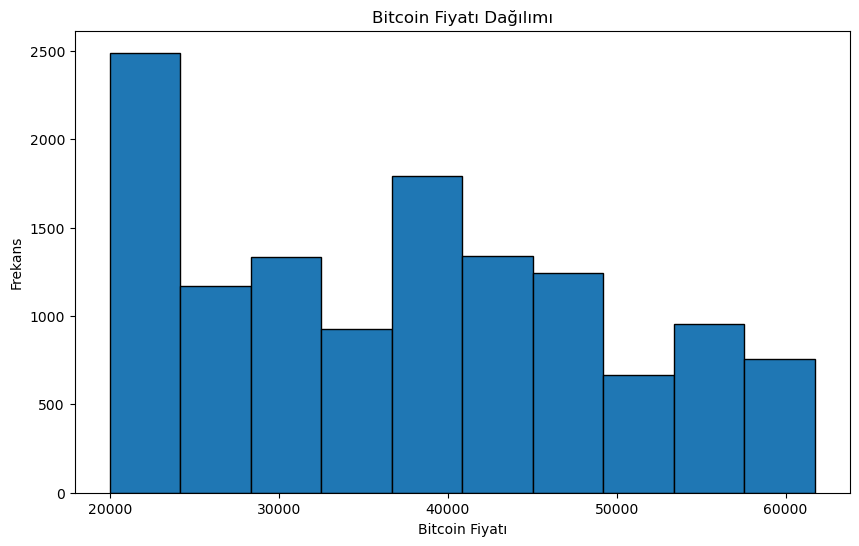

In [6]:
plt.figure(figsize=(10,6))
plt.hist(final1['Price'], bins=10, edgecolor='black')
plt.title('Bitcoin Fiyatı Dağılımı')
plt.xlabel('Bitcoin Fiyatı')
plt.ylabel('Frekans')
plt.show()

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() #küçük harf
    text = re.sub(r'[^\w\s]', '', text) #noktalama kaldırma
    #text = re.sub(r'\d+', '', text) #sayıları kaldırma
    word_tokens = word_tokenize(text) #tokenleştirme
    filtered_text = [lemmatizer.lemmatize(w) for w in word_tokens if not w in stop_words] # Stopwords'leri kaldırma ve lemmatization
    return " ".join(filtered_text)


# DataFrame'deki metni ön işleme
final1['processed_title'] = final1['Haber_Basliklari'].apply(preprocess_text)
final1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Van_P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Van_P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Van_P\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Van_P\AppData\Local\Temp\ipykernel_21408\2156024528.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['processed_title'] = final1['Haber_Basliklari'].apply(preprocess_text)


,Haber_Basliklari,Dates,Price,processed_title
0,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...,30.05.23,27735.0,coindesk turn 10 2021 year bitcoin became salv...
1,Bitcoin Mining Difficulty’s Record Setting Str...,30.05.23,27735.0,bitcoin mining difficulty record setting strea...
2,La dificultad para minar bitcoin alcanzó un ré...,30.05.23,27735.0,la dificultad para minar bitcoin alcanzó un ré...
3,BRC-721E Token Standard Converts Ethereum NFTs...,30.05.23,27735.0,brc721e token standard convert ethereum nfts b...
4,Bitcoin Headed for First Monthly Loss in 6 Months,30.05.23,27735.0,bitcoin headed first monthly loss 6 month
...,...,...,...,...
28995,Stablecoins 'Flip' Ethereum's Native Currency ...,30.05.23,27735.0,stablecoins flip ethereums native currency tra...
28996,"Better Regulation Could Curb Crypto Scams, Cha...",30.05.23,27735.0,better regulation could curb crypto scam chain...
28997,Most of MakerDAO's Asset Value Is in Only a Fe...,30.05.23,27735.0,makerdaos asset value address
28998,Uphold Introduces Commission-Free Trading for ...,30.05.23,27735.0,uphold introduces commissionfree trading user


In [8]:
from collections import Counter

words = [word for sentence in final1['processed_title'] for word in sentence.split()]

word_counts = Counter(words)

for word, count in word_counts.most_common():
    print(f"{word}: {count}")

bitcoin: 6616
crypto: 3116
market: 1312
first: 822
u: 595
mining: 586
mover: 557
ether: 531
price: 521
bitcoins: 506
say: 501
de: 497
wrap: 471
news: 444
new: 436
blockchain: 397
roundup: 397
miner: 381
fed: 364
bank: 351
2021: 339
etf: 326
future: 315
report: 315
asia: 314
exchange: 313
el: 309
trading: 308
high: 306
digital: 302
btc: 292
fund: 286
investor: 269
sec: 269
ethereum: 260
ceo: 260
could: 255
coinbase: 251
amid: 249
week: 247
inflation: 247
support: 246
america: 243
rally: 241
token: 240
2022: 240
la: 237
year: 230
rise: 226
trader: 219
launch: 218
hit: 215
buy: 211
asset: 211
defi: 211
next: 209
drop: 209
may: 209
stock: 194
see: 192
salvador: 187
cryptos: 187
firm: 183
back: 180
ahead: 179
china: 179
record: 178
fall: 178
data: 176
rate: 174
hold: 171
en: 170
option: 169
raise: 169
resistance: 167
nfts: 165
money: 159
show: 156
top: 152
surge: 147
analyst: 146
time: 145
investment: 145
gain: 142
network: 140
month: 139
payment: 139
binance: 138
since: 132
go: 127
global:

In [9]:
final1['processed_title'] = final1['processed_title'].apply(lambda x: x.split())

word_counts = Counter([word for sentence in final1['processed_title'] for word in sentence])

min_frequency = 2

final1['processed_title'] = final1['processed_title'].apply(lambda x: [word for word in x if word_counts[word] > min_frequency])

final1['processed_title'] = final1['processed_title'].apply(lambda x: ' '.join(x))
final1

C:\Users\Van_P\AppData\Local\Temp\ipykernel_21408\399626664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['processed_title'] = final1['processed_title'].apply(lambda x: x.split())
C:\Users\Van_P\AppData\Local\Temp\ipykernel_21408\399626664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['processed_title'] = final1['processed_title'].apply(lambda x: [word for word in x if word_counts[word] > min_frequency])
C:\Users\Van_P\AppData\Local\Temp\ipykernel_21408\399626664.py:9: SettingWithC

,Haber_Basliklari,Dates,Price,processed_title
0,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...,30.05.23,27735.0,coindesk turn 10 2021 year bitcoin became salv...
1,Bitcoin Mining Difficulty’s Record Setting Str...,30.05.23,27735.0,bitcoin mining difficulty record setting strea...
2,La dificultad para minar bitcoin alcanzó un ré...,30.05.23,27735.0,la dificultad para minar bitcoin alcanzó un ré...
3,BRC-721E Token Standard Converts Ethereum NFTs...,30.05.23,27735.0,brc721e token standard convert ethereum nfts b...
4,Bitcoin Headed for First Monthly Loss in 6 Months,30.05.23,27735.0,bitcoin headed first monthly loss 6 month
...,...,...,...,...
28995,Stablecoins 'Flip' Ethereum's Native Currency ...,30.05.23,27735.0,stablecoins flip ethereums currency transfer v...
28996,"Better Regulation Could Curb Crypto Scams, Cha...",30.05.23,27735.0,better regulation could curb crypto scam chain...
28997,Most of MakerDAO's Asset Value Is in Only a Fe...,30.05.23,27735.0,asset value address
28998,Uphold Introduces Commission-Free Trading for ...,30.05.23,27735.0,uphold introduces trading user


In [16]:
#Tf id vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X2 = vectorizer.fit_transform(final1['processed_title'])
y=final1['Price']
print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['02' '10' '100' ... 'zipmex' 'zone' 'índice']


In [10]:
#count_vector selected
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(final1['processed_title'])
y=final1['Price']
print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['02' '10' '100' ... 'zipmex' 'zone' 'índice']


In [18]:
# Creating  and test dataset
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

In [11]:
# Creating  and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
#{'alpha': 0, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 50, 'subsample': 0.5}
from sklearn.metrics import r2_score
import xgboost as xg

xg_reg = xg.XGBRegressor(colsample_bytree = 1, learning_rate = 0.1,max_depth = 20, alpha = 0, n_estimators = 50,
                         subsample=0.5,reg_lambda=2)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print(r2_score(y_test, preds))

RMSE: 11109.784580
0.12076081058325538


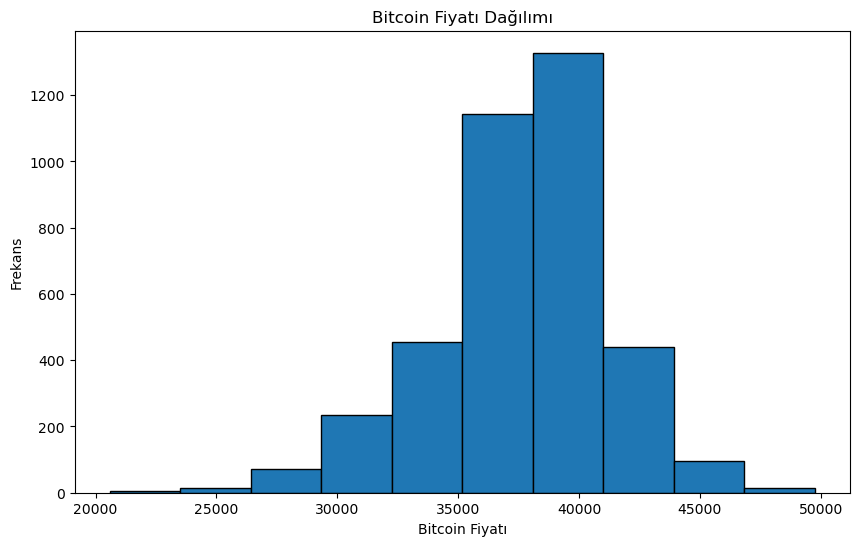

In [13]:
plt.figure(figsize=(10,6))
plt.hist(preds, bins=10, edgecolor='black')
plt.title('Bitcoin Fiyatı Dağılımı')
plt.xlabel('Bitcoin Fiyatı')
plt.ylabel('Frekans')
plt.show()

In [22]:
news_title = ["market wrap analyst see upside ether bitcoin stall"]
news_title_vectorized = vectorizer.transform(news_title)
prediction = xg_reg.predict(news_title_vectorized)
print("Predicted Bitcoin price: ", prediction)

Predicted Bitcoin price:  [38491.223]


In [597]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='r2',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    return fitted_model, pred

In [598]:
import time
model = xg_reg
start=time.time()
param_grid = {'max_depth': [-1,10,20,30],
             'n_estimators':[30,50,100,150],
              'subsample':[0.05,0.1,0.2,0,4,0.5]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()

print(np.sqrt(-model.best_score_))
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\Van_P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Van_P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Van_P\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Van_P\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\Van_P\anaconda3\lib\site-packages\xgboost\core.py", line 

nan
{'max_depth': 10, 'n_estimators': 50, 'subsample': 0.5}
Time Taken with GridSearchCV: 72.5305666923523


C:\Users\Van_P\AppData\Local\Temp\ipykernel_10488\3762668954.py:12: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-model.best_score_))


In [19]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(num_leaves=31,learning_rate = 0.1, n_estimators = 10,max_depth=20,subsample=0.5)

lgbm_reg.fit(X_train2, y_train)

preds = lgbm_reg.predict(X_test2)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print(r2_score(y_test, preds))

RMSE: 11445.656999
0.06679466044931759


In [20]:
news_title = ["market wrap analyst see upside ether bitcoin stall"]
news_title_vectorized = vectorizer.transform(news_title)
prediction = lgbm_reg.predict(news_title_vectorized)
print("Predicted Bitcoin price: ", prediction)

Predicted Bitcoin price:  [38059.44496643]


In [368]:
model = lgbm_reg
start=time.time()
param_grid = {'max_depth': [-1,5,7,10,14,20],
             'n_estimators':[5,10,20,30,50],
             'learning_rate':[0.05,0.1,0.2],
              'subsample':[0.05,0.1,0.2,0,4,0.5],
             'num_leaves':[10,20,30,40],
             'n_estimators':[25,50,100,150]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()

print(np.sqrt(-model.best_score_))
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\Van_P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Van_P\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Van_P\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\Van_P\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C:\Users\Van_P\

126.2657142039699
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 40, 'subsample': 0.05}
Time Taken with GridSearchCV: 849.141078710556


In [707]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear',epsilon=0.2) # linear kernel is used here, you can try 'rbf' or others as well

svr_model.fit(X_train2, y_train)

y_pred = svr_model.predict(X_test2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 11762.056711213574


In [690]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=5, random_state=1,n_estimators = 50)

rf_reg.fit(X_train, y_train)

preds = rf_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print(r2_score(y_test, preds))

RMSE: 11574.421014
0.045679369865553654


In [351]:
from sklearn.neural_network import MLPRegressor

nn_reg = MLPRegressor(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42)

nn_reg.fit(X_train, y_train)

preds = nn_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 21197.801732


C:\Users\Van_P\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [453]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X1=final1['processed_title']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.3)

max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=16000
test_portion=.1

tokenizer = Tokenizer()
tokenizer.fit_on_texts(final1['processed_title'])
word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences_train = tokenizer.texts_to_sequences(X_train1)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

sequences_test = tokenizer.texts_to_sequences(X_test1)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [462]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 64

model = Sequential()

model.add(Embedding(vocab_size+1, embedding_dim, input_length=max_length))

model.add(LSTM(64))

model.add(Dense(1, activation='linear')) # Linear activation, regression problem için uygun

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

num_epochs = 100
history = model.fit(padded_train, y_train, epochs=num_epochs, validation_data=(padded_test, y_test))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 64)           879168    
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 912,257
Trainable params: 912,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
388/388 [==============================] - 15s 34ms/step - loss: 1244166656.0000 - val_loss: 1252221952.0000
Epoch 2/100
388/388 [==============================] - 13s 33ms/step - loss: 1242447360.0000 - val_loss: 1250581760.0000
Epoch 3/100
388/388 [==============================] - 13s 33ms/step 

In [463]:
pred = model.predict(padded_test)
print('RMSE:\t', metrics.mean_squared_error(y_test, pred, squared = False))

166/166 [==============================] - 2s 10ms/step
RMSE:	 33149.675961581925


In [692]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.model_selection import train_test_split

X1=final1['processed_title']
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.3)
# BERT tokenizer ve modeli
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


# Cümlelerin tokenize edilmesi
train_encodings = tokenizer(X_train1.tolist(), padding=True, truncation=True, return_tensors="pt")
test_encodings = tokenizer(X_test1.tolist(), padding=True, truncation=True, return_tensors="pt")

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)
    
# Eğitim ve test dataloaderlarının oluşturulması
train_dataset = TextDataset(train_encodings, y_train)
test_dataset = TextDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
epochs=10
# Eğitim döngüsü
for epoch in range(epochs):
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

# Test verilerinde tahmin
for batch in test_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

predictions = model(input_ids, attention_mask=attention_mask)

# RMSE hesaplama
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = predictions.logits.detach().numpy()
y_true = labels.detach().numpy()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

KeyError: 7020